---
title: 'Utiliza las características calculadas de GLCM, GRL y SDH y prueba los clasificadores por arboles de decisión:'
format:
  pdf:
    toc: false
    geometry: margin=0.8in
    code-line-wrapping: true
    keep-tex: true
jupyter:
  jupytext:
    text_representation:
      extension: .qmd
      format_name: quarto
      format_version: '1.0'
      jupytext_version: 1.17.2
  kernelspec:
    display_name: nn
    language: python
    name: python3
---

- Arboles de decisión
- Random Forest
- Adaboost 

#### Prueba los siguientes casos:

Caso 1: Uso de GLCM sin y con PCA para los tres tipos de clasificadores. SOLO SE VAN A REPORTAR LAS MATRICES DE CONFUSION DEL MEJOR CASO. Ejemplo: Random Forest con PCA fue mejor que sin PCA, entonces se reporta solo la de sin PCA.

Caso 2: Uso de GLR sin y con PCA para los tres tipos de clasificadores. Misma instrucción, SOLO SE VAN A REPORTAR LAS MATRICES DE CONFUSION DEL MEJOR CASO. 

Caso 3: Uso de SDH sin y con PCA para los tres tipos de clasificadores. Misma instrucción SOLO SE VAN A REPORTAR LAS MATRICES DE CONFUSION DEL MEJOR CASO. 

Caso 4: Combinar todas las características, usar PCA y LDA para los tres tipos de clasificadores SOLO SE VAN A REPORTAR LAS MATRICES DE CONFUSION DEL MEJOR CASO, sea PCA o LDA.

Caso 5: Escoger el mejor clasificador de los casos 1 a 3, solo el mejor de todos, y a ese aplicar reducción por LDA y nuevamente clasificar. Reportar estos resultados. Por ejemplo: El mejor desempeño lo tiene Adaboost para SDH sin PCA, entonces a las características SDH se le aplica LDA y se vuelve a entrenar el clasificador AdaBoost, esta matriz de confusión resultante es la que se reporta.


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

Datos cargados correctamente.


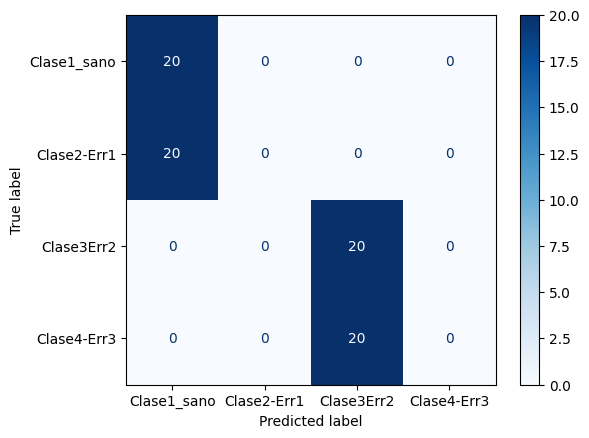

Matriz de confusión para Árbol de Decisión sin PCA:
Exactitud (Accuracy): 0.5000
Precision (Precision): 0.2500
Sensibilidad (Recall): 0.5000
Puntaje F1 (F1-score): 0.3333


c:\Users\CuentaTemporal\miniconda3\envs\nn\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [8]:
"""Caso 1: Uso de GLCM sin y con PCA para los tres tipos de clasificadores.
SOLO SE VAN A REPORTAR LAS MATRICES DE CONFUSION DEL MEJOR CASO.
Ejemplo: Random Forest con PCA fue mejor que sin PCA, entonces
se reporta solo la de sin PCA."""

# Cargar los datos
data = pd.read_csv(r'GLRL.csv')  # Asegúrate de que la ruta al archivo sea correcta
#drop two columns
X = data.drop('Clase', axis=1)  # Asumiendo que la columna 'label' es la etiqueta
X = X.drop('Nombre_Imagen', axis=1)  # Eliminar la columna 'Nombre_Imagen'
y = data['Clase']
print("Datos cargados correctamente.")

#Sin PCA
X_train, X_test, y_train, y_test =
  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Entrenar el modelo de Árbol de Decisión
#decision_tree =
#  DecisionTreeClassifier(
#    random_state=42,
#    max_depth=5,
#    min_samples_split=10,
#    min_samples_leaf=5
#  )
decision_tree =
  DecisionTreeClassifier(
    random_state=42,
    max_depth=1,
    min_samples_split=2,
    min_samples_leaf=1
  )
decision_tree.fit(X_train, y_train)
# Predecir y evaluar
y_pred = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=decision_tree.classes_
)

disp.plot(cmap='Blues')
plt.show()
print("Matriz de confusión para Árbol de Decisión sin PCA:")

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud (Accuracy): {accuracy:.4f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Precision): {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntaje F1 (F1-score): {f1:.4f}')

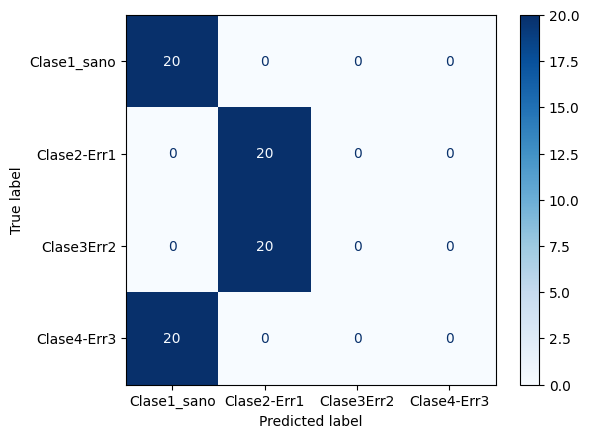

Matriz de confusión para Árbol de Decisión con PCA:
Exactitud (Accuracy): 0.5000
Precision (Precision): 0.2500
Sensibilidad (Recall): 0.5000
Puntaje F1 (F1-score): 0.3333


c:\Users\CuentaTemporal\miniconda3\envs\nn\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [9]:
#Con PCA 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test =
  train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
# Entrenar el modelo de Árbol de Decisión
decision_tree =
  DecisionTreeClassifier(random_state=42, max_depth=1, min_samples_split=2, min_samples_leaf=1)
decision_tree.fit(X_train, y_train)
# Predecir y evaluar
y_pred = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=decision_tree.classes_
)
disp.plot(cmap='Blues')
plt.show()
print("Matriz de confusión para Árbol de Decisión con PCA:")

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud (Accuracy): {accuracy:.4f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Precision): {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntaje F1 (F1-score): {f1:.4f}')

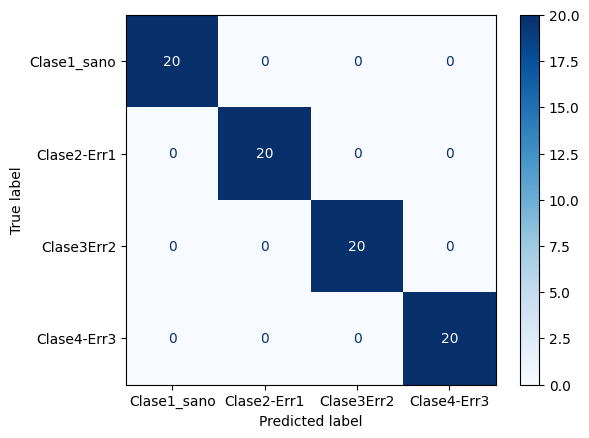

Matriz de confusión para Random Forest sin PCA:
Exactitud (Accuracy): 1.0000
Precision (Precision): 1.0000
Sensibilidad (Recall): 1.0000
Puntaje F1 (F1-score): 1.0000


In [10]:
#Random Forest sin PCA
rf = RandomForestClassifier(
  random_state=42, n_estimators=100,
  max_depth=1,
  min_samples_split=2,
  min_samples_leaf=1
)
X_train, X_test, y_train, y_test =
  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf.fit(X_train, y_train)
# Predecir y evaluar
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.show()
print("Matriz de confusión para Random Forest sin PCA:")

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud (Accuracy): {accuracy:.4f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Precision): {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntaje F1 (F1-score): {f1:.4f}')

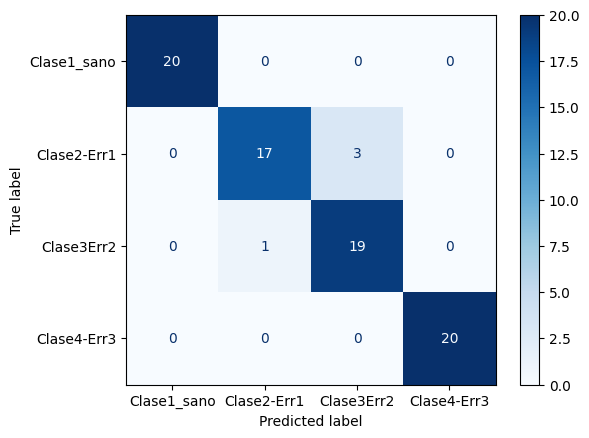

Matriz de confusión para Random Forest con PCA:
Exactitud (Accuracy): 0.9500
Precision (Precision): 0.9520
Sensibilidad (Recall): 0.9500
Puntaje F1 (F1-score): 0.9499


In [15]:
#Random Forest con PCA
rf = RandomForestClassifier(
  random_state=42,
  n_estimators=100,
  max_depth=1,
  min_samples_split=2,
  min_samples_leaf=1
)
X_train, X_test, y_train, y_test = 
  rain_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
rf.fit(X_train, y_train)
# Predecir y evaluar
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.show()
print("Matriz de confusión para Random Forest con PCA:")

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud (Accuracy): {accuracy:.4f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Precision): {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntaje F1 (F1-score): {f1:.4f}')

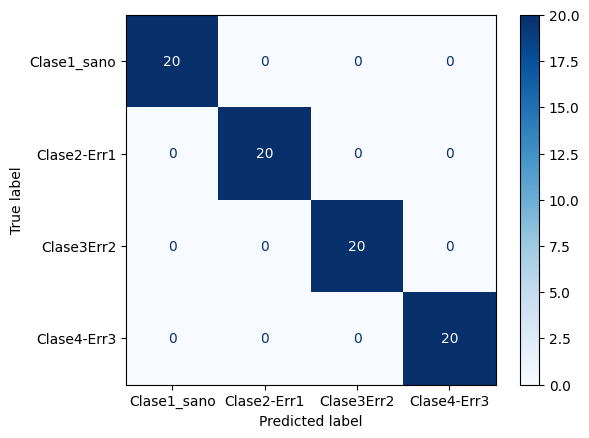

Matriz de confusión para Random Forest con LDA:
Exactitud (Accuracy): 1.0000
Precision (Precision): 1.0000
Sensibilidad (Recall): 1.0000
Puntaje F1 (F1-score): 1.0000


In [16]:
#Random Forest con LDA
#Con LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_lda = lda.fit_transform(X,y)


rf = RandomForestClassifier(
  random_state=42,
  n_estimators=100,
  max_depth=1,
  min_samples_split=2,
  min_samples_leaf=1
)
X_train, X_test, y_train, y_test =
  train_test_split(X_lda, y, test_size=0.2, random_state=42, stratify=y)
rf.fit(X_train, y_train)
# Predecir y evaluar
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.show()
print("Matriz de confusión para Random Forest con LDA:")

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud (Accuracy): {accuracy:.4f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Precision): {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntaje F1 (F1-score): {f1:.4f}')

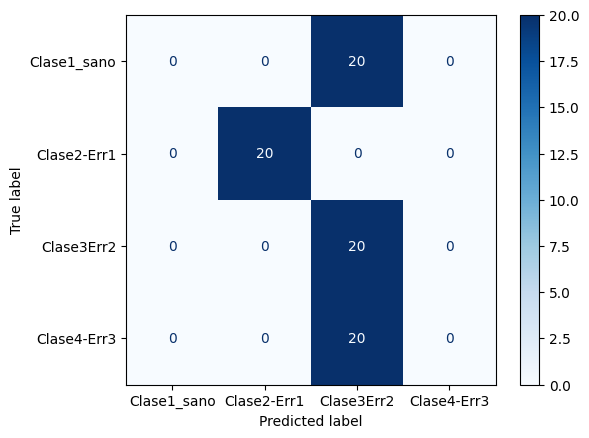

Matriz de confusión para AdaBoost sin PCA:
Exactitud (Accuracy): 0.5000
Precision (Precision): 0.3333
Sensibilidad (Recall): 0.5000
Puntaje F1 (F1-score): 0.3750


c:\Users\CuentaTemporal\miniconda3\envs\nn\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [13]:
#AdaBoost sin PCA
clf = DecisionTreeClassifier(
  random_state=42 ,max_depth=1,
  min_samples_split=2,
  min_samples_leaf=1
)
ada = AdaBoostClassifier(estimator=clf, n_estimators=50, random_state=42)
X_train, X_test, y_train, y_test =
  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
ada.fit(X_train, y_train)
# Predecir y evaluar
y_pred = ada.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot(cmap='Blues')
plt.show()
print("Matriz de confusión para AdaBoost sin PCA:")

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud (Accuracy): {accuracy:.4f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Precision): {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntaje F1 (F1-score): {f1:.4f}')

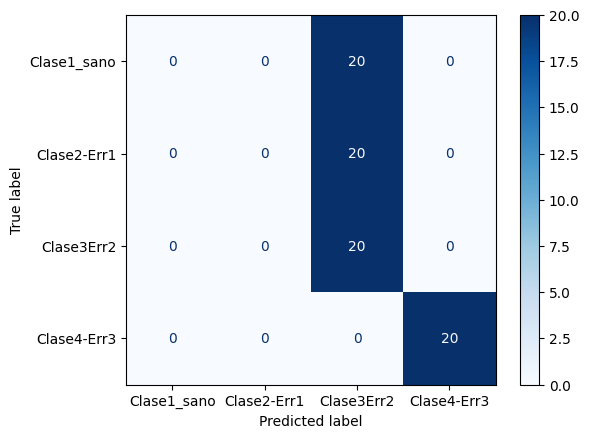

Matriz de confusión para AdaBoost con PCA:
Exactitud (Accuracy): 0.5000
Precision (Precision): 0.3333
Sensibilidad (Recall): 0.5000
Puntaje F1 (F1-score): 0.3750


c:\Users\CuentaTemporal\miniconda3\envs\nn\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [14]:
#AdaBoost con PCA
clf = DecisionTreeClassifier(
  random_state=42 ,max_depth=1,
  min_samples_split=2,
  min_samples_leaf=1
)
ada = AdaBoostClassifier(estimator=clf, n_estimators=50, random_state=42)
X_train, X_test, y_train, y_test =
train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
ada.fit(X_train, y_train)
# Predecir y evaluar
y_pred = ada.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot(cmap='Blues')
plt.show()
print("Matriz de confusión para AdaBoost con PCA:")

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud (Accuracy): {accuracy:.4f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision (Precision): {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntaje F1 (F1-score): {f1:.4f}')